#Librerías necesarias para la realización del TP

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler

#neural
!pip install keras-tuner -q

     |████████████████████████████████| 135 kB 4.7 MB/s 
     |████████████████████████████████| 1.6 MB 9.4 MB/s 


#Datasets necesarios para la realización del TP

##Se cargan los datasets creados en el TP1

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
try:
  # el archivo ya está cargado en el sistema
  df_ENCODED_train = pd.read_csv('df_clasificacion_train_ENCODED.csv', index_col='index')
  df_ENCODED_test = pd.read_csv('df_clasificacion_test_ENCODED.csv', index_col='index')

  df_PCA_ENCODED_train = pd.read_csv('df_clasificacion_PCA_train_ENCODED.csv', index_col='index')
  df_PCA_ENCODED_test = pd.read_csv('df_clasificacion_PCA_test_ENCODED.csv', index_col='index')
except:
  df_ENCODED_train = pd.read_csv('drive/My Drive/tp1 datos grupal/Datasets/df_clasificacion_train_ENCODED.csv', index_col='index')
  df_ENCODED_test = pd.read_csv('drive/My Drive/tp1 datos grupal/Datasets/df_clasificacion_test_ENCODED.csv', index_col='index')

  df_PCA_ENCODED_train = pd.read_csv('drive/My Drive/tp1 datos grupal/Datasets/df_clasificacion_PCA_train_ENCODED.csv', index_col='index')
  df_PCA_ENCODED_test = pd.read_csv('drive/My Drive/tp1 datos grupal/Datasets/df_clasificacion_PCA_test_ENCODED.csv', index_col='index')

##Se carga el dataset que contiene las descripciones de las propiedades

In [4]:
try:
  # el archivo ya está cargado en el sistema
  csv = pd.read_csv('properati_argentina_2021_decrip.csv')
  
except:
  # cargar usando el acceso directo 'Datasets' 
  # puesto en la carpeta MyDrive del drive del usuario
  csv = pd.read_csv('drive/My Drive/tp1 datos grupal/Datasets/properati_argentina_2021_decrip.csv')

In [5]:
# me quedo del data set de descripcion los indices de las filas que estamos usando en el dataset generalt
desc_train = csv.loc[df_ENCODED_train.index]
desc_test = csv.loc[df_ENCODED_test.index]

##Observaciones útiles sobre los datasets

**OBS:** 
A 'tipo_precio' se le realizó Label Encoding, mapeando de la siguiente manera:
  
    • ['tipo_precio'].map({'Bajo' : 0, 'Medio' : 1, 'Alto' : 2})

Mientras que a 'property_type' y 'comuna' se les aplicó One Hot Encoding

In [6]:
df_ENCODED_train.head(3)

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,comuna_2,comuna_3,comuna_4,comuna_5,...,comuna_11,comuna_12,comuna_13,comuna_14,comuna_15,property_type_Departamento,property_type_PH,property_price,tipo_precio,pxm2
index,,,,,,,,,,,,,,,,,,,,,
100248,-34.63706,-58.462541,7.0,5.0,260.0,260.0,0,0,0,0,...,0,0,0,0,0,0,0,245000.0,0,942.307692
1472,-34.61354,-58.372464,3.0,2.0,68.0,40.0,0,0,0,0,...,0,0,0,0,0,0,1,90000.0,1,1323.529412
117479,-34.61051,-58.426603,4.0,3.0,210.0,175.0,0,0,0,1,...,0,0,0,0,0,1,0,450000.0,1,2142.857143


In [7]:
csv.head(n=3)

,id,property_description
0,BZCeiGkJr1WBUi6pKJQwJQ==,Corredor Responsable: MARIA ALEJANDRA GENOVEVA...
1,zuHOGgUE0UB71W7m/YCLoA==,¡HERMOSO PH TIPO CASA DE 2 AMBIENTES!<br>APTO ...
2,TUL813tXchVBlHUsfaA6DA==,Excelente PH en Núñez 4 amb!!!! Oportunidad !!...


Al igual que en el TP1 no utilizamos el 'id', en su lugar se utiliza el index.

In [8]:
csv.drop(columns=['id'], axis=1, inplace=True)

In [9]:
csv.head(n=3)

,property_description
0,Corredor Responsable: MARIA ALEJANDRA GENOVEVA...
1,¡HERMOSO PH TIPO CASA DE 2 AMBIENTES!<br>APTO ...
2,Excelente PH en Núñez 4 amb!!!! Oportunidad !!...


In [10]:
print('Dimensionalidad de df_ENCODED_train:', df_ENCODED_train.shape,
      '\nDimensionalidad de df_ENCODED_test:', df_ENCODED_test.shape,
      '\nDimensionalidad de df_PCA_ENCODED_train:', df_PCA_ENCODED_train.shape,
      '\nDimensionalidad de df_ENCODED_train:', df_PCA_ENCODED_test.shape,
      '\nDimensionalidad del DataFrame que contiene las descripciones de las propiedades:', csv.shape)

Dimensionalidad de df_ENCODED_train: (58682, 25) 
Dimensionalidad de df_ENCODED_test: (14514, 25) 
Dimensionalidad de df_PCA_ENCODED_train: (58682, 22) 
Dimensionalidad de df_ENCODED_train: (14514, 22) 
Dimensionalidad del DataFrame que contiene las descripciones de las propiedades: (460154, 1)


Se filtran las propiedades según el índice de los dataset obtenidos en el TP1. Esto funciona bien ya fuimos cautelosos con conservar los índices originales provistos en el Dataset original de Properati.

In [11]:
df_descripciones_train = csv.loc[df_ENCODED_train.index]
print('\nDimensionalidad del DataFrame que contiene las descripciones de las propiedades (train):', df_descripciones_train.shape)


Dimensionalidad del DataFrame que contiene las descripciones de las propiedades (train): (58682, 1)


In [12]:
df_descripciones_test = csv.loc[df_ENCODED_test.index]
print('\nDimensionalidad del DataFrame que contiene las descripciones de las propiedades (test):', df_descripciones_test.shape)


Dimensionalidad del DataFrame que contiene las descripciones de las propiedades (test): (14514, 1)


#**1.Procesamiento del Lenguaje Natural**

##a) Ampliación del dataset

### Bag of words

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import re
import unicodedata
import string

#### Funciones para el pre procesamiento de la descripcion




In [14]:
lista_adhoc = ["a", "ante", "cabe", "con", "de", "desde", "durante", "en", 
           "entre", "hacia", "hasta", "mediante", "para", "por", "según",
           "sin", "so", "sobre", "tras", "versus", "via", "el", "la", "los", 
           "del", "las", "los", "etc", "es", "era", "br", "y", "que", "al", 
           "o", "un", "ba", "una", "se", "", "cocina", "ambientes", "piso", 
           "pisos", "propiedad", "son", "muy", "esta", "dos", "cuadras",
           "completo", "corredor", "responsable", "inmueble", "excelente", 
           "amplio", "accede", "cucicba", "medidas", "cuenta", "lendar", 
           "queres", "ley", "podes", "gran", "aire", "simula", "metros",
           "mls", "personas", "parte", "inmobiliario", "encuentra", "independiente",
           "todas", "todos", "unidades", "presente", "tiene", "este", "mas",
           "unidad", "aviso", "operacion", "bajo", "propietario", "como", "informacion",
           "operaciones", "mts", "discapacidades"
           ]

In [15]:
def useless_words():
  prefix = 'drive/MyDrive/tp1 datos grupal/'
  with open(prefix + 'words/stopwords.txt') as f:
    stopwords = f.read().splitlines()
  
  with open(prefix + 'words/adverbios.txt') as f:
    adverbios = f.read().splitlines()

  with open(prefix + 'words/adjetivos.txt') as f:
    adjetivos = f.read().splitlines()
    
  return stopwords + adjetivos + adverbios + lista_adhoc

inutiles = useless_words()

Usar BOW para representar palabras en la columna descripción

In [16]:
def limpieza_inicial(df):
    # Eliminamos caracteres inecesarios
    print('Eliminando caracteres innecesarios...')
    df['property_description'] = df['property_description'].str.replace("\[.*?¿\]\%", " ", regex=True);
    df['property_description'] = df['property_description'].str.replace("\[.*?¿\]\%", " ", regex=True);
    df['property_description'] = df['property_description'].str.replace("\[.*?¿\]\%", " ", regex=True);
    df['property_description'] = df['property_description'].str.replace("[‘’“”…«»]", " ", regex=True);
    df['property_description'] = df['property_description'].str.replace("/[,;:!?¡¿]+/g", " ", regex=True);
    
    # Eliminamos palabras con numeros
    print("Eliminando palabras con numeros...")
    df['property_description'] = df['property_description'].str.replace('w*\d\w*', ' ', regex=True)
    
    # Remplazamos saltos si los hubiera por espacios
    print("Reemplazando saltos de linea / etiquetas de html por espacios...")
    df['property_description'] = df['property_description'].str.replace('\n', ' ', regex=True)
    df['property_description'] = df['property_description'].str.replace('<br>', ' ', regex=True)
    df['property_description'] = df['property_description'].str.lower()
    return df

In [17]:
def from_counter(counter, df):
  desc = counter.transform(df.property_description.values.astype('U'))    
  test_df = pd.DataFrame(desc.toarray(), columns=counter.get_feature_names())
  test_df.index = test_df.index
  return test_df

def bag_of_words(df):
  prefix = 'drive/MyDrive/tp1 datos grupal/'
  with open(prefix + 'words/stopwords.txt') as f:
    stopwords = f.read().splitlines()
  
  with open(prefix + 'words/adverbios.txt') as f:
    adverbios = f.read().splitlines()

  with open(prefix + 'words/adjetivos.txt') as f:
    adjetivos = f.read().splitlines()

  counter = CountVectorizer(stop_words=inutiles, lowercase=True, strip_accents='unicode', decode_error='ignore', max_features=400)
  counter.fit(df.property_description.values.astype('U'))   
  return counter


In [18]:
train = desc_train.copy()[desc_train.property_description.notna()]
train_limpio = limpieza_inicial(train)

Eliminando caracteres innecesarios...
Eliminando palabras con numeros...
Reemplazando saltos de linea / etiquetas de html por espacios...


In [19]:
counter = bag_of_words(train_limpio)
desc_df = from_counter(counter, train_limpio)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['33', 'aaronico', 'abadi', 'abajeno', 'abancaino', 'abasi', 'abes', 'abietaceo', 'abietineo', 'abiologico', 'abiotico', 'abipon', 'abismatico', 'ablandahigos', 'abluido', 'abrileno', 'abromico', 'abstraido', 'abudabi', 'abulico', 'abunolado', 'abunuelado', 'abuson', 'aca', 'academicamente', 'academico', 'acalorico', 'acantaceo', 'acantoforo', 'acanutado', 'acapulqueno', 'acastanado', 'acatalectico', 'acatolico', 'acebeno', 'acechon', 'acefalo', 'aceraceo', 'acerineo', 'acertajon', 'acetico', 'achara', 'ache', 'achenes', 'aciclico', 'acido', 'acidulo', 'acientifico', 'acimo', 'acinetico', 'aclamideo', 'aclorofilo', 'acompanador', 'aconcaguino', 'acrata', 'acratico', 'acratopoto', 'acrobatico', 'acrocarpico', 'acrocentrico', 'acrodendrofilo', 'acroginos', 'acronico', 'acrostico', 'acuatico', 'a

In [20]:
bow_df_train = desc_df

#### Test

In [21]:
test = desc_test.copy()
test_limpio = limpieza_inicial(test)
bow_df_test = from_counter(counter, test_limpio)

Eliminando caracteres innecesarios...
Eliminando palabras con numeros...
Reemplazando saltos de linea / etiquetas de html por espacios...


In [22]:
pares_palabra_frecuencia_train = bow_df_train.sum()
pares_palabra_frecuencia_test = bow_df_test.sum()

#### Examinar palabras clave

Palabras clave que probablemente afectan al precio de una propiedad:

In [23]:
pares_palabra_frecuencia_train['expensas']

21041

In [24]:
pares_palabra_frecuencia_train['frente']

26329

In [25]:
pares_palabra_frecuencia_train['patio']

14559

In [26]:
pares_palabra_frecuencia_train['terraza']

14515

In [27]:
pares_palabra_frecuencia_train['parrilla']

15940

In [28]:
pares_palabra_frecuencia_train['piscina']

7944

In [29]:
pares_palabra_frecuencia_train['seguridad']

10050

In [30]:
pares_palabra_frecuencia_train['gimnasio']

3633

#### A partir de los aspectos relevantes que influyen en el precio de la propiedad, se pueden crear nuevas columnas.

Se parte del supuesto de que en la descripción de la propiedad los vendedores resaltan los aspectos POSITIVOS de la misma. Por lo tanto si la propiedad NO tiene cierta cualidad, probablemente no aparezca esa palabra en la descripción (los aspectos negativos no atraen a los posibles compradores, es preferible directamente no mencionar dicho aspecto antes que exponer que la propiedad NO TIENE tal cosa).

De este modo, las cualidades relevantes tienen dos valores posibles. Por ejemplo: Si la propiedad tiene balcon, la columna 'balcon' será igual a 1, caso contrario 'balcon' = 0. De mismo modo, se puede evaluar si la propiedad da al 'frente', si es 'luminoso', si tiene 'terraza', 'piscina', 'patio', etc...

In [31]:
nuevas_columnas_train = pd.DataFrame()
nuevas_columnas_test = pd.DataFrame()

In [32]:
descripciones_train = train_limpio.property_description
descripciones_test = test_limpio.property_description

In [33]:
nuevas_columnas_train['balcon'] = train_limpio.property_description.str.contains('balcon|balcón|Balcón|BALCON|Balcon|BALCÓN', regex=True)
nuevas_columnas_test['balcon'] = test_limpio.property_description.str.contains('balcon|balcón|Balcón|BALCON|Balcon|BALCÓN', regex=True)

In [34]:
nuevas_columnas_train['balcon'].value_counts()

False    37703
True     20973
Name: balcon, dtype: int64

Hay aproximadamente 20k de propiedades en train que tienen balcón, es una cantidad razonable ya que en el TP1 se verificó que 'Departamento' representa la mayor cantidad de propiedades en venta en CABA.

In [35]:
nuevas_columnas_test['balcon'].value_counts()

False    9317
True     5197
Name: balcon, dtype: int64

Hay aproximadamente 5k de propiedades en test que tienen balcón.

In [36]:
nuevas_columnas_train['terraza'] = descripciones_train.str.contains('terraza|Terraza|TERRAZA', regex=True)
nuevas_columnas_test['terraza'] = descripciones_test.str.contains('terraza|Terraza|TERRAZA', regex=True)

In [37]:
nuevas_columnas_train['terraza'].value_counts()

False    46193
True     12483
Name: terraza, dtype: int64

Hay aproximadamente 12k de propiedades en train que tienen terraza. Esta cantidad también resulta lógica por el mismo motivo detallado anteriormente, a su vez en este caso se puede agregar que no todos los departamentos permiten acceso a terraza, por lo que se supone que sólo se menciona este aspecto en las descripciones de departamentos que si permiten acceso.

In [38]:
nuevas_columnas_test['terraza'].value_counts()

False    11438
True      3076
Name: terraza, dtype: int64

Hay aproximadamente 3k de propiedades en test que tienen terraza.

In [39]:
nuevas_columnas_train['piscina'] = descripciones_train.str.contains('piscina|Piscina|PISCINA', regex=True)
nuevas_columnas_test['piscina'] = descripciones_test.str.contains('piscina|Piscina|PISCINA', regex=True)

In [40]:
nuevas_columnas_train['piscina'].value_counts()

False    52053
True      6623
Name: piscina, dtype: int64

Aproximadamente 6k de propiedades en train tienen piscina

In [41]:
nuevas_columnas_test['piscina'].value_counts()

False    12924
True      1590
Name: piscina, dtype: int64

Aproximadamente 1.5k de propiedades en test tienen piscina

In [42]:
nuevas_columnas_train['parrilla'] = descripciones_train.str.contains('parrilla|Parrilla|PARRILLA', regex=True)
nuevas_columnas_test['parrilla'] = descripciones_test.str.contains('parrilla|Parrilla|PARRILLA', regex=True)

In [43]:
nuevas_columnas_train['parrilla'].value_counts()

False    43571
True     15105
Name: parrilla, dtype: int64

Aproximadamente 15k de propiedades en train tienen parrilla.

In [44]:
nuevas_columnas_test['parrilla'].value_counts()

False    10872
True      3642
Name: parrilla, dtype: int64

Aproximadamente 15k de propiedades en test tienen parrilla

In [45]:
nuevas_columnas_train['gimnasio'] = descripciones_train.str.contains('gimnasio|Gimnasio|GIMNASIO', regex=True)
nuevas_columnas_test['gimnasio'] = descripciones_test.str.contains('gimnasio|Gimnasio|GIMNASIO', regex=True)

In [46]:
nuevas_columnas_train['gimnasio'].value_counts()

False    55016
True      3660
Name: gimnasio, dtype: int64

In [47]:
nuevas_columnas_test['gimnasio'].value_counts()

False    13575
True       939
Name: gimnasio, dtype: int64

Encoding para las nuevas columnas

In [48]:
nuevas_columnas_train.head(3)

,balcon,terraza,piscina,parrilla,gimnasio
index,,,,,
100248,False,False,False,True,False
1472,True,True,True,False,False
117479,False,False,False,False,False


In [49]:
for (label, content) in nuevas_columnas_train.iteritems():
    nuevas_columnas_train[label] = nuevas_columnas_train[label].map({True:1,False:0},na_action=None)

for (label, content) in nuevas_columnas_test.iteritems():
    nuevas_columnas_test[label] = nuevas_columnas_test[label].map({True:1,False:0},na_action=None)

In [50]:
nuevas_columnas_train.head(3)

,balcon,terraza,piscina,parrilla,gimnasio
index,,,,,
100248,0,0,0,1,0
1472,1,1,1,0,0
117479,0,0,0,0,0


### Minqing Hu & Bing Liu

Usamos una versión simplificada de Minqing Hu & Bing Liu usando un lexicon de palabras que indican valor, revisando qué palabras las tienen como vecinas. Éstas son candidatas a nuevas columnas, cuyos valores son las palabras de valor.

Buscar palabras y frases repetidas: Lo tenemos en el análisis BOW

In [51]:
sorted(pares_palabra_frecuencia_train.items(),  key=lambda pair: -pair[1])[:10]

[('bano', 53748),
 ('living', 39735),
 ('casa', 32040),
 ('dormitorios', 29839),
 ('dormitorio', 29036),
 ('balcon', 28940),
 ('planta', 26813),
 ('frente', 26329),
 ('departamento', 26015),
 ('edificio', 21100)]

#### Hallar juicios de valor
 para cada palabra le asignamos un score dependiendo de cuantos juicios de valor tienen asociadas

Creamos una lista de las palabras más comunes

In [52]:
keywords = list(pares_palabra_frecuencia_train.keys())

In [53]:
#limpiemos las palabras claves manualmente: 'aires' nos causará problema por 'buenos aires'!
keywords.remove('aires')
keywords.remove('carlos')
keywords.remove('avenida')

Definimos métodos

In [54]:
MAX_CHARACTERS_PER_TEXT = 300
def tokenize(text):
  text = re.sub("[\\W]"," ", text)
  words = str(text)[:MAX_CHARACTERS_PER_TEXT].split()[:-1]
  return words

In [55]:
def combine_lists(series):
  li = []
  for text in series:
    textlist = re.sub("[\\W]"," ", text)
    textlist = textlist.split()
    li += textlist
  return li

In [56]:
#get neighbors of i-th word
def _get_index_neighbors(full_word_list, i):
  try:
    return [full_word_list[i-1], full_word_list[i+1]]
  except:
    neighs = [i-1, i+1]
    for n in neighs:
      if n in range(0, len(full_word_list)):
        return [full_word_list[n]]
    return []


def _instances_of_word(_word, _list):
  return (i for i,word in enumerate(_list) if word==_word)

def get_neighbors_list(_word, _list):
    neighbors = []
    for i in _instances_of_word(_word, _list):
        neighbors += _get_index_neighbors(_list, i)
    return neighbors

Este algoritmo le da un 'valor de juicio' a las palabras más comunes, dependiendo de qué tan a menudo palabras de valor (buen, mal, barato, agradable) aparecen como sus vecinas. Usamos este puntaje para seleccionar las *candidatas* a columnas.

In [57]:
def value_judgements(neighbors, value_words):
  points = 0
  for neighbor in neighbors:
    for value_word in value_words:
      if neighbor.startswith(value_word):
        points += 1
  return points / len(neighbors) if len(neighbors) else 0

Obtenemos lista de todas las palabras en el dataset en secuencia

In [58]:
sample = train_limpio.property_description.sample(2000, random_state=0)

In [59]:
words = combine_lists(sample)

In [60]:
n = get_neighbors_list('bano',words)

In [61]:
value_words = ['buen',  'gran', 'excelente', 'hermos']

In [62]:
word_value_judgement = {}
word_neighbors = {}
for word in keywords:
  neighbors = get_neighbors_list(word,words)
  value = value_judgements(neighbors, value_words)
  word_value_judgement[word] = value
  word_neighbors[word] = neighbors
  print(word + ": " + str(value))

aberturas: 0.008426966292134831
abl: 0.0
acceso: 0.02111324376199616
acero: 0.0
actualizacion: 0
ademas: 0.02
afip: 0.003703703703703704
agentes: 0.0
agua: 0.0026595744680851063
alacena: 0.0
alacenas: 0.010526315789473684
alquiler: 0.0071090047393364926
altura: 0.0072992700729927005
aluminio: 0.002688172043010753
amb: 0.017857142857142856
ambiente: 0.01932367149758454
amenities: 0.019230769230769232
amplia: 0.0019083969465648854
amplios: 0.0
anafe: 0.009708737864077669
ano: 0
anos: 0
antiguedad: 0.0
aprox: 0.015384615384615385
aproximadas: 0.0
aproximados: 0.002564102564102564
area: 0.0
arquitectonicas: 0
artefactos: 0.0
ascensor: 0.018072289156626505
ascensores: 0.004201680672268907
automatico: 0.05
autos: 0.018867924528301886
av: 0.0
aysa: 0.0
bacha: 0.004310344827586207
baja: 0.005580357142857143
bajas: 0.00641025641025641
balcon: 0.008571428571428572
banera: 0.0
banker: 0.0
bano: 0.0
banos: 0
barra: 0.015060240963855422
barrio: 0.004173622704507512
baulera: 0.019553072625698324
bel

Basado a estos puntajes obtenemos palabras con alto puntaje, estas serán candidatas a ser columnas

In [63]:
k = 5
candidates = sorted(word_value_judgement.items(),  key=lambda pair: -pair[1])[:5]

In [64]:
candidates

[('dimensiones', 0.29577464788732394),
 ('ubicacion', 0.2565789473684211),
 ('oportunidad', 0.18489583333333334),
 ('calidad', 0.13451086956521738),
 ('ventanales', 0.12980769230769232)]

In [65]:
candidates = list(map(lambda pair: pair[0], candidates))

In [66]:
candidates

['dimensiones', 'ubicacion', 'oportunidad', 'calidad', 'ventanales']

Teniendo las candidatas, creamos las nuevas columnas y las rellenamos por cada descripción con la palabra de valor relevante

In [67]:
for word in candidates:
  try:
    print(word_neighbors[word])
  except:
    pass

['m', 'totales', 'grandes', 'con', 'buenas', 'con', 'de', 'generosas', 'buenas', 'lavadero', 'buenas', 'x', 'cómodas', 'cocina', 'buenas', 'con', 'buenas', 'uno', 'medidas', 'del', 'excelentes', 'y', 'grandes', 'muy', 'amplias', 'con', 'cómodas', 'con', 'grandes', 'en', 'generosas', 'yhogar', 'grandes', 'ensuite', 'grandes', 'en', 'excelentes', 'que', 'grandes', 'hall', 'buenas', 'y', 'grandes', 'con', 'buenas', 'por', 'buenas', 'con', 'grandes', 'y', 'buenas', 'con', 'buenas', 'y', 'generales', 'sup', 'generosas', 'equipado', 'generosas', 'en', 'generosas', 'en', 'cómodas', 'excelente', 'grandes', 'cocina', 'excelentes', 'y', 'buenas', 'los', 'buenas', 'con', 'buenas', 'desde', 'amplias', 'donde', 'buenas', 'con', 'buenas', 'con', 'buenas', 'losa', 'generosas', 'toilette', 'amplísimas', 'con', 'amplias', 'baño', 'buenas', 'con', 'buenas', 'bajas', 'generosas', 'y', 'grandes', 'cocina', 'grandes', 'otroos', 'generosas', 'x', 'importantes', 'se', 'generosas', 'con', 'buenas', 'al', 'cuy

In [68]:
import random
random.seed(0)
random.shuffle(value_words)

In [69]:
def new_col(cand, df):
  column = []
  for text in df:
    value = np.nan
    #tokenizar
    text = tokenize(text)
    # obtener posicion del match con el candidato y extraer vecinos
    neighbors = []
    for i,word in enumerate(text):
      if cand == word:
        neighbors = _get_index_neighbors(text, i)
        break
    # si alguna hace 'match' con las palabras de valor, devolver 
    # la posicion de la palabra de valor en el vector value_words
    for neighbor in neighbors:
      for value_word in value_words:
        if str(neighbor).startswith(str(value_word)):
          value = int(value_words.index(value_word))
    
    column.append(value)
  return pd.Series(data=column, index=df.index, name=cand)


#### Ejecutar para train:

In [70]:
new_minqing_train = pd.DataFrame(index =train_limpio.index)
descripciones_train = train_limpio.property_description

In [71]:
for cand in candidates:
  desc_con_candidatos_train = descripciones_train[descripciones_train.str.contains(cand, regex=False)]
  col = new_col(cand, desc_con_candidatos_train)
  new_minqing_train.insert(0, cand, np.nan)
  new_minqing_train[cand].update(col)

In [72]:
new_minqing_train.ubicacion[new_minqing_train.ubicacion.notna()].value_counts()

0.0    511
1.0    118
2.0     13
3.0      2
Name: ubicacion, dtype: int64

In [73]:
new_minqing_train[new_minqing_train.calidad.notna()]

,ventanales,calidad,oportunidad,ubicacion,dimensiones
index,,,,,
209785,NaN,0.0,NaN,NaN,NaN
218626,NaN,0.0,NaN,NaN,NaN
264642,NaN,1.0,NaN,NaN,NaN
393587,NaN,0.0,NaN,NaN,NaN
295267,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...
59392,NaN,0.0,NaN,NaN,NaN
263938,NaN,1.0,NaN,NaN,NaN
202985,NaN,2.0,NaN,NaN,NaN


In [74]:
new_minqing_train.apply(pd.Series.value_counts)

,ventanales,calidad,oportunidad,ubicacion,dimensiones
0.0,NaN,492,483,511,26.0
1.0,4.0,207,29,118,113.0
2.0,262.0,74,212,13,110.0
3.0,11.0,5,72,2,NaN


#### Repetir con test
Usando el metodo new_col y los mismos candidatos y value_words que en train, obtenemos los datos en el mismo formato

In [75]:
new_minqing_test = pd.DataFrame(index =test_limpio.index)
descripciones_test = test_limpio.property_description

In [76]:
for cand in candidates:
  desc_con_candidatos_test = descripciones_test[descripciones_test.str.contains(cand, regex=False)]
  col = new_col(cand, desc_con_candidatos_test)
  new_minqing_test.insert(0, cand, np.nan)
  new_minqing_test[cand].update(col)

In [77]:
new_minqing_test.ubicacion[new_minqing_test.ubicacion.notna()].value_counts()

0.0    147
1.0     25
2.0      2
3.0      1
Name: ubicacion, dtype: int64

In [78]:
new_minqing_test[new_minqing_test.calidad.notna()]

,ventanales,calidad,oportunidad,ubicacion,dimensiones
index,,,,,
55632,NaN,0.0,NaN,NaN,NaN
243872,NaN,0.0,NaN,NaN,NaN
176333,NaN,0.0,NaN,NaN,NaN
411785,NaN,1.0,NaN,NaN,NaN
459370,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...
314632,NaN,2.0,NaN,NaN,NaN
352735,2.0,0.0,NaN,NaN,NaN
79457,NaN,0.0,NaN,NaN,NaN


In [79]:
new_minqing_test.apply(pd.Series.value_counts)

,ventanales,calidad,oportunidad,ubicacion,dimensiones
0.0,1.0,121.0,113,147,8.0
1.0,1.0,49.0,8,25,32.0
2.0,64.0,20.0,62,2,32.0
3.0,NaN,NaN,15,1,NaN


#### Entrenar OneHotEncoder con datos de train

##### nombres de columnas

In [80]:
categories = [list(range(0, len(value_words)))]*k

In [81]:
categories

[[0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3]]

In [82]:
final_columns = []
for i in range(0, len(categories)):
  for index in categories[i]:
    final_columns.append(value_words[index] + '_'+ candidates[i])

In [83]:
final_columns

['excelente_dimensiones',
 'buen_dimensiones',
 'gran_dimensiones',
 'hermos_dimensiones',
 'excelente_ubicacion',
 'buen_ubicacion',
 'gran_ubicacion',
 'hermos_ubicacion',
 'excelente_oportunidad',
 'buen_oportunidad',
 'gran_oportunidad',
 'hermos_oportunidad',
 'excelente_calidad',
 'buen_calidad',
 'gran_calidad',
 'hermos_calidad',
 'excelente_ventanales',
 'buen_ventanales',
 'gran_ventanales',
 'hermos_ventanales']

##### Crear y entrenar encoder

In [84]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', categories=categories)

In [85]:
#toma alrededor de 10 minutos para 5 columnas
enc.fit(new_minqing_train)

OneHotEncoder(categories=[[0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3],
                          [0, 1, 2, 3], [0, 1, 2, 3]],
              handle_unknown='ignore')

##### Aplicar a train

In [86]:
t = enc.transform(new_minqing_train)

In [87]:
new_minqing_enc_train = pd.DataFrame(t.toarray(), index=new_minqing_train.index, columns=final_columns)

In [88]:
new_minqing_enc_train.apply(pd.Series.value_counts)

,excelente_dimensiones,buen_dimensiones,gran_dimensiones,hermos_dimensiones,excelente_ubicacion,buen_ubicacion,gran_ubicacion,hermos_ubicacion,excelente_oportunidad,buen_oportunidad,gran_oportunidad,hermos_oportunidad,excelente_calidad,buen_calidad,gran_calidad,hermos_calidad,excelente_ventanales,buen_ventanales,gran_ventanales,hermos_ventanales
0.0,58676.0,58672,58414,58665,58184,58469,58602,58671,58193,58647,58464,58604,58165,58558,58663,58674,58650,58563,58566,58676.0
1.0,NaN,4,262,11,492,207,74,5,483,29,212,72,511,118,13,2,26,113,110,NaN


##### Aplicar a **test**

In [89]:
t = enc.transform(new_minqing_test)

In [90]:
new_minqing_enc_test = pd.DataFrame(t.toarray(), index=new_minqing_test.index, columns=final_columns)

In [91]:
new_minqing_enc_test.apply(pd.Series.value_counts)

,excelente_dimensiones,buen_dimensiones,gran_dimensiones,hermos_dimensiones,excelente_ubicacion,buen_ubicacion,gran_ubicacion,hermos_ubicacion,excelente_oportunidad,buen_oportunidad,gran_oportunidad,hermos_oportunidad,excelente_calidad,buen_calidad,gran_calidad,hermos_calidad,excelente_ventanales,buen_ventanales,gran_ventanales,hermos_ventanales
0.0,14513,14513,14450,14514.0,14393,14465,14494,14514.0,14401,14506,14452,14499,14367,14489,14512,14513,14506,14482,14482,14514.0
1.0,1,1,64,NaN,121,49,20,NaN,113,8,62,15,147,25,2,1,8,32,32,NaN


### Nuevo Dataset Ampliado

In [92]:
df_ENCODED_AMPLIADO_train = pd.concat([df_ENCODED_train, nuevas_columnas_train, new_minqing_enc_train], axis = 1)
df_ENCODED_AMPLIADO_test = pd.concat([df_ENCODED_test, nuevas_columnas_test, new_minqing_enc_test], axis = 1)

In [93]:
df_ENCODED_AMPLIADO_test.head(2)

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,comuna_2,comuna_3,comuna_4,comuna_5,...,gran_oportunidad,hermos_oportunidad,excelente_calidad,buen_calidad,gran_calidad,hermos_calidad,excelente_ventanales,buen_ventanales,gran_ventanales,hermos_ventanales
index,,,,,,,,,,,,,,,,,,,,,
352750,-34.557663,-58.462888,3.0,2.0,65.0,65.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94517,-34.558780,-58.458498,3.0,2.0,57.0,49.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##b) Modelos

Entrenar un modelo XGBoost para regresión con el nuevo dataset ampliado
considerando los siguientes escenarios

In [94]:
import sklearn as sk
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn import metrics

###● Utilizar los mismos hiperparámetros seleccionados en el TP 1

En este inciso se toman los mejores hiperparametros obtenidos mediante Grid Search Cross Validation, utilizando XGBRegressor objective='reg:squarederror') como estimador: 

    'GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=XGBRegressor(objective='reg:squarederror'),
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5],
                         'gamma': [0.0, 0.2, 0.4],
                         'learning_rate': (0.1, 0.2, 0.4),
                         'max_depth': [8, 16, 32],
                         'min_child_weight': [5, 10, 20]},
             return_train_score='True',
             scoring=make_scorer(mean_squared_error))'

Se utilizó la estrategia Error cuadrático medio (Mean squared error) para evaluar el rendimiento del modelo de validación cruzada en el conjunto de prueba, obteniendo que los mejores parametros son: 

    {'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.4, 'max_depth': 8, 'min_child_weight': 10} 

Con estos hiperparámetros se entrenó el modelo XGBRegressor en el TP1, obteniendo:

    El error (mse) de train es: 1118917868.550943
    El error (rmse) de train es: 33450.22972344051

    El error (mse) de test es: 2136148658.8986006
    El error (rmse) de test es: 46218.4882801093


A cuntinuación se entrena un nuevo modelo XGBoost Regressor utilizando los mismos hiperparámetros, pero en este caso se utiliza el nuevo dataset ampliado:

In [95]:
df_ENCODED_AMPLIADO_test.sample(n=5)

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,comuna_2,comuna_3,comuna_4,comuna_5,...,gran_oportunidad,hermos_oportunidad,excelente_calidad,buen_calidad,gran_calidad,hermos_calidad,excelente_ventanales,buen_ventanales,gran_ventanales,hermos_ventanales
index,,,,,,,,,,,,,,,,,,,,,
321533,-34.599050,-58.431376,2.0,1.0,51.0,46.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
384158,-34.630538,-58.419221,2.0,1.0,44.0,39.0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
301410,-34.600052,-58.393015,4.0,3.0,105.0,96.0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204257,-34.603159,-58.406324,2.0,1.0,40.0,33.0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
263961,-34.597881,-58.428325,2.0,1.0,34.0,34.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
x_train = df_ENCODED_AMPLIADO_train.drop(['property_price', 'pxm2'], axis=1)
y_train = df_ENCODED_AMPLIADO_train['property_price']

x_test = df_ENCODED_AMPLIADO_test.drop(['property_price', 'pxm2'], axis=1)
y_test = df_ENCODED_AMPLIADO_test['property_price']

model_XGBRegressor =  xgb.XGBRegressor(**{'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.4, 'max_depth': 8, 'min_child_weight': 10} )
model_XGBRegressor.fit(x_train, y_train)

[22:41:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.5, gamma=0.0, learning_rate=0.4, max_depth=8,
             min_child_weight=10)

In [97]:
#Performance para datos de TRAIN
y_pred = model_XGBRegressor.predict(x_train)

mse = metrics.mean_squared_error(
        y_true  = y_train,
        y_pred  = y_pred,
        squared = True
       )

print(f"El error (mse) de train es: {mse}")
print(f"El error (rmse) de train es: {np.sqrt(mse)}")

El error (mse) de train es: 366771767.0423513
El error (rmse) de train es: 19151.286302552926


In [98]:
#Performance para datos de TEST
y_pred = model_XGBRegressor.predict(x_test)
mse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = True
       )

print(f"El error (mse) de test es: {mse}")
print(f"El error (rmse) de test es: {np.sqrt(mse)}")

El error (mse) de test es: 823276118.2381783
El error (rmse) de test es: 28692.788610349086


###● Utilizar hiperparametros optimizados con el nuevo dataset ampliado.

In [99]:
#Conjunto de parámetros que quiero usar
params_grid = {"learning_rate": (0.1, 0.2, 0.4),
                        "max_depth": [3, 4, 5, 8, 10],
                        "min_child_weight": [4, 5, 10, 7, 9, 13, 20],
                        "gamma":[ 0.0, 0.01, 0.1, 0.2, 0.4],
                        "colsample_bytree":[ 0.3, 0.5, 0.8]}                    
                
#Cantidad de folds utilizados
folds=5

#KFold
kfoldcv = KFold(n_splits=folds)

#Modelo
model =  xgb.XGBRegressor(objective = "reg:squarederror")

#Usamos MSE como métrica para buscar hiperparámetros
scorer_fn = make_scorer(sk.metrics.mean_squared_error)

#GridSearch CV
gridcv = GridSearchCV(estimator=model,param_grid=params_grid,scoring=scorer_fn,cv=kfoldcv,return_train_score='True')

In [100]:
gridcv.fit(x_train[:100], y_train.values[:100])

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBRegressor(objective='reg:squarederror'),
             param_grid={'colsample_bytree': [0.3, 0.5, 0.8],
                         'gamma': [0.0, 0.01, 0.1, 0.2, 0.4],
                         'learning_rate': (0.1, 0.2, 0.4),
                         'max_depth': [3, 4, 5, 8, 10],
                         'min_child_weight': [4, 5, 10, 7, 9, 13, 20]},
             return_train_score='True',
             scoring=make_scorer(mean_squared_error))

In [101]:
#Mejores hiperparametros del arbol
print(gridcv.best_params_)
#Mejor métrica
print(gridcv.best_score_)

{'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.4, 'max_depth': 3, 'min_child_weight': 13}
3705817739.256602


A partir de los hiperparametros optimizados con el nuevo dataset ampliado se entrena un nuevo modelo XGBoost Regressor

In [102]:
model_XGBRegressor_Optimizado =  xgb.XGBRegressor(**gridcv.best_params_)
model_XGBRegressor_Optimizado.fit(x_train, y_train)

[22:46:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.5, gamma=0.0, learning_rate=0.4,
             min_child_weight=13)

In [103]:
#Performance para datos de TRAIN
y_pred = model_XGBRegressor_Optimizado.predict(x_train)

mse = metrics.mean_squared_error(
        y_true  = y_train,
        y_pred  = y_pred,
        squared = True
       )

print(f"El error (mse) de train es: {mse}")
print(f"El error (rmse) de train es: {np.sqrt(mse)}")


El error (mse) de train es: 969922808.3101186
El error (rmse) de train es: 31143.583742243256


In [104]:
#Performance para datos de TEST
y_pred = model_XGBRegressor_Optimizado.predict(x_test)
mse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = True
       )

print(f"El error (mse) de test es: {mse}")
print(f"El error (rmse) de test es: {np.sqrt(mse)}")

El error (mse) de test es: 1018051571.3193722
El error (rmse) de test es: 31906.920429890633


### Se guardan los nuevos modelos XGBRegressor entrenados 

In [105]:
import joblib  

try:
  joblib.dump(model_XGBRegressor, 'drive/My Drive/tp1 datos grupal/ModelosTP2/XGBoostRegressor_TP2.pkl')
  joblib.dump(model_XGBRegressor_Optimizado, 'drive/My Drive/tp1 datos grupal/ModelosTP2/XGBoostRegressor_TP2_OPTIMIZADO.pkl')
except:
  joblib.dump(model_XGBRegressor, 'XGBoostRegressor_TP2.pkl')
  joblib.dump(model_XGBRegressor_Optimizado, 'XGBoostRegressor_TP2_OPTIMIZADO.pkl')

### Análisis de performance

Con hiperparámetros optimizados para el dataset generado en el TP1 se entrenó el modelo XGBRegressor utilizando dicho dataset, obteniendo:

    El error (mse) de train es: 1118917868.550943
    El error (rmse) de train es: 33450.22972344051

    El error (mse) de test es: 2136148658.8986006
    El error (rmse) de test es: 46218.4882801093

Se puede apreciar tomando la raíz del error cuadrático medio que la diferencia entre la performance de train y test es de aproximadamente 13k USD.

Luego con los mismos hiperparámetros se entrenó un nuevo modelo XGBoost Regressor, pero en este caso se utilizó el nuevo dataset ampliado, obteniendo una performance que mejoró significativamente:

    El error (mse) de train es: 366771767.0423513
    El error (rmse) de train es: 19151.286302552926
   
    El error (mse) de test es: 823276118.2381783
    El error (rmse) de test es: 28692.788610349086

Con los nuevos aspectos obtenidos utilizando diversas técnicas de procesamiento del lenguaje natural sobre las descripciones de las propiedades se logró reducir el RMSE de test de 46218 USD a 28692 USD, es decir se predice con alrededor de 18k USD menos de RMSE. Se puede apreciar de todas formas que sigue habiendo una diferencia considerable entre la performance en train y test, en este caso de aproximadamente 10k USD

Por último se hizo búsqueda de nuevos hiperparametros optimizados con el dataset ampliado, y se entrenó un nuevo modelo XGBoost Regressor que performó de la siguiente manera:

    El error (mse) de train es: 969922808.3101186
    El error (rmse) de train es: 31143.583742243256

    El error (mse) de test es: 1018051571.3193722
    El error (rmse) de test es: 31906.920429890633

Si bien con los nuevos hiperparametros optimizados no se logró mejorar la performance en test, de hecho se obtuvo un RMSE aproximadamente 3k USD mayor que el obtenido utilizando los hiperparametros del TP1, se puede apreciar que a diferencia de los modelos anteriores, en este caso la performance en train y test fue muy pareja, esto puede deberse a que al agregar nuevos aspectos se logró reducir el sesgo por lo que este modelo performó mejor que los anteriores en datos no vistos, por ende puede decirse también que los modelos anteriores sobreajustaron más los datos de train.

#**2. Redes Neuronales**

Construir dos modelos de redes neuronales, uno para regresión y otro para clasificación,
considerando los datasets creados en el TP1. Mejorar estos modelos de redes
neuronales a través de la búsqueda de arquitectura e hiperparámetros adecuados. 

In [279]:
# porción del dataset train usado para búsqueda de parámetros
TUNER_PROPORTION=0.01
#porción del dataset de búsqueda de parámetros usado para validar
TUNER_TEST_PROPORTION = 0.2
# Parámetros de training para todos los modelos
max_trials=10
executions_per_trial=2
epochs = 24

Usamos un diccionario para guardar la performance con cada dataset en regresión y clasificación

In [280]:
results_reg = {}
results_clas = {}

##● Regresión:

### Dataset normal

#### Crear modelo

Predecir el precio de la propiedad y utilizar como métrica de
evaluación el error cuadrático medio.

Defino conjuntos de train y test:

In [281]:
x_train = df_ENCODED_train.drop(['tipo_precio','property_price','pxm2'], axis=1).values
y_train = df_ENCODED_train['property_price'].values

x_test = df_ENCODED_test.drop(['tipo_precio','property_price','pxm2'], axis=1).values
y_test = df_ENCODED_test['property_price'].values

Escalo los datos usando MinMax:

In [282]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

'build_model_from_parameters' crea y compila un modelo keras basado en los hiperparámetros:
- units: neuronas en una capa
- activation: función de activación
- dropout: booleano para hacer o no dropout
- lr: el learning rate del modelo.
- num_layers: capas del modelo

Luego build_model usa la utilidad HyperParameters() para crear un espacio de búsqueda de hiperparámetros

In [283]:
# def hiperparams
def build_model_from_parameters(units, activation, dropout, lr, num_layers):
    model = keras.Sequential()
    for i in range(0,num_layers):
        model.add(layers.Dense(units=units, activation=activation))
    if dropout:
        model.add(layers.Dropout(rate=0.25))
    model.add(layers.Dense(1))
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss = 'mae',
        metrics = ['mse']
    )
    return model

def build_model(hp):
    units = hp.Int("units", min_value=4, max_value=16, step=8)
    activation = hp.Choice("activation", ["relu", "tanh", "linear"])
    dropout = hp.Boolean("dropout")
    learn_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    layers = hp.Int("units", min_value=2, max_value=4, step=1)
    model = build_model_from_parameters(
        units=units, 
        activation=activation, 
        dropout=dropout, 
        lr=learn_rate, 
        num_layers = layers
    )
    return model


In [284]:
import keras_tuner

Creamos el tuner con el método build_model, e imprimimos el espacio de búsqueda creado

In [285]:
tuner = keras_tuner.RandomSearch(
    seed = 0,
    hypermodel=build_model,
    objective='mse',
    max_trials=max_trials,
    executions_per_trial=executions_per_trial,
    overwrite=True,
    directory=".",
    project_name="helloworld",
)
tuner.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 16, 'step': 8, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'linear'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


Seleccionamos un subconjunto del conjunto train, para hacer tuning de hiperparámetros. Este se divide en una parte train y una parte de validación

In [286]:
from sklearn.model_selection import train_test_split
train_size = TUNER_PROPORTION*(1-TUNER_TEST_PROPORTION)
test_size = TUNER_PROPORTION*TUNER_TEST_PROPORTION
X_train_, X_eval = train_test_split(x_train, train_size = train_size, test_size=test_size, random_state=0)
y_train_, y_eval = train_test_split(y_train, train_size = train_size, test_size=test_size, random_state=0)

In [287]:
tuner.search(X_train_, y_train_, epochs=2, validation_data=(X_eval, y_eval))

Trial 10 Complete [00h 00m 03s]
mse: 67456468992.0

Best mse So Far: 67448250368.0
Total elapsed time: 00h 00m 32s


Armamos el mejor modelo e imprimimos un resumen de sus capas

In [288]:
# Get the top model.
models = tuner.get_best_models(num_models=1)
best_model = models[0]
# Build the model.
best_model.build((None, x_train.shape[1]))
best_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 92        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 157
Trainable params: 157
Non-trainable pa

In [289]:
tuner.results_summary()

Results summary
Results in ./helloworld
Showing 10 best trials
Trial summary
Hyperparameters:
units: 4
activation: linear
dropout: True
lr: 0.008405929459905032
Score: 67448250368.0
Trial summary
Hyperparameters:
units: 12
activation: tanh
dropout: True
lr: 0.004225151089377672
Score: 67454785536.0
Trial summary
Hyperparameters:
units: 12
activation: linear
dropout: True
lr: 0.00019629629306016258
Score: 67455782912.0
Trial summary
Hyperparameters:
units: 12
activation: tanh
dropout: False
lr: 0.0007321845733528145
Score: 67455991808.0
Trial summary
Hyperparameters:
units: 4
activation: linear
dropout: True
lr: 0.0010481568787078452
Score: 67456227328.0
Trial summary
Hyperparameters:
units: 4
activation: relu
dropout: True
lr: 0.0004176533732789332
Score: 67456401408.0
Trial summary
Hyperparameters:
units: 12
activation: relu
dropout: True
lr: 0.0002607860606751251
Score: 67456407552.0
Trial summary
Hyperparameters:
units: 4
activation: relu
dropout: False
lr: 0.0001097893053558189
Sco

In [290]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 92        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 157
Trainable params: 157
Non-trainable pa

#### Entrenar

In [291]:
his = best_model.fit(
 x_train, y_train,
 batch_size = 32,
 epochs = epochs,
 verbose = 1,
 validation_split = 0.1)

Epoch 1/24
1651/1651 [==============================] - 6s 3ms/step - loss: 72798.6797 - mse: 14922683392.0000 - val_loss: 44049.0703 - val_mse: 6940418048.0000
Epoch 2/24
1651/1651 [==============================] - 3s 2ms/step - loss: 59151.5781 - mse: 9795593216.0000 - val_loss: 42324.6719 - val_mse: 6462645760.0000
Epoch 3/24
1651/1651 [==============================] - 3s 2ms/step - loss: 58099.8320 - mse: 9225388032.0000 - val_loss: 42761.6914 - val_mse: 6406047744.0000
Epoch 4/24
1651/1651 [==============================] - 3s 2ms/step - loss: 58044.1992 - mse: 9213030400.0000 - val_loss: 42072.1211 - val_mse: 6146726400.0000
Epoch 5/24
1651/1651 [==============================] - 3s 2ms/step - loss: 58398.8398 - mse: 9347416064.0000 - val_loss: 42333.9883 - val_mse: 6338819072.0000
Epoch 6/24
1651/1651 [==============================] - 3s 2ms/step - loss: 57850.5430 - mse: 9230665728.0000 - val_loss: 41871.7109 - val_mse: 5986722816.0000
Epoch 7/24
1651/1651 [=================

#### Evaluar

Evaluamos el modelo final y guardamos el MSE:

In [292]:
y_pred = best_model.predict(
 x_test)

454/454 [==============================] - 1s 2ms/step


In [293]:
m = tf.keras.metrics.MeanSquaredError()
m.update_state(y_test, y_pred)

print(f"El error (mse) de test es: {m.result().numpy()}")
print(f"El error (rmse) de test es: {np.sqrt(m.result().numpy())}")

El error (mse) de test es: 5560621568.0
El error (rmse) de test es: 74569.578125


In [294]:
results_reg['normal'] = m.result().numpy()

Además veo el MAPE:

In [295]:
m = tf.keras.metrics.MeanAbsolutePercentageError()
m.update_state(y_test, y_pred)
m.result().numpy()

21.357111

### Se guarda el modelo de redes neuronales para regresión entrenado con el dataset obtenido en el TP1

In [296]:
import joblib  

try:
  joblib.dump(best_model, 'drive/My Drive/tp1 datos grupal/ModelosTP2/RedNeuronalRegresion.pkl')
except:
  joblib.dump(best_model, 'RedNeuronalRegresion.pkl')

### Dataset PCA

#### Crear modelo

In [297]:
x_train = df_PCA_ENCODED_train.drop(['tipo_precio','property_price','pxm2'], axis=1).values
y_train = df_PCA_ENCODED_train['property_price'].values

x_test = df_PCA_ENCODED_test.drop(['tipo_precio','property_price','pxm2'], axis=1).values
y_test = df_PCA_ENCODED_test['property_price'].values

In [298]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Creamos el tuner e imprimimos el espacio de búsqueda creado

In [299]:
tuner = keras_tuner.RandomSearch(
    seed = 0,
    hypermodel=build_model,
    objective='mse',
    max_trials=max_trials,
    executions_per_trial=executions_per_trial,
    overwrite=True,
    directory=".",
    project_name="helloworld",
)
tuner.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 16, 'step': 8, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'linear'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


Seleccionamos un subconjunto del conjunto train, para hacer tuning de hiperparámetros. Este se divide en una parte train y una parte de validación

In [300]:
from sklearn.model_selection import train_test_split
train_size = TUNER_PROPORTION*(1-TUNER_TEST_PROPORTION)
test_size = TUNER_PROPORTION*TUNER_TEST_PROPORTION
X_train_, X_eval = train_test_split(x_train, train_size = train_size, test_size=test_size, random_state=0)
y_train_, y_eval = train_test_split(y_train, train_size = train_size, test_size=test_size, random_state=0)

In [301]:
tuner.search(X_train_, y_train_, epochs=2, validation_data=(X_eval, y_eval))

Trial 10 Complete [00h 00m 03s]
mse: 67455553536.0

Best mse So Far: 62581620736.0
Total elapsed time: 00h 00m 34s


Armamos el mejor modelo e imprimimos un resumen de sus capas

In [302]:
# Get the top model.
models = tuner.get_best_models(num_models=1)
best_model = models[0]
# Build the model.
best_model.build((None, x_train.shape[1]))
best_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                240       
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dense_3 (Dense)             (None, 12)                156       
                                                                 
 dense_4 (Dense)             (None, 12)                156       
                                                                 
 dense_5 (Dense)             (None, 12)                156       
                                                                 
 dense_6 (Dense)             (None, 12)                1

In [303]:
tuner.results_summary()

Results summary
Results in ./helloworld
Showing 10 best trials
Trial summary
Hyperparameters:
units: 12
activation: linear
dropout: True
lr: 0.00514372526116168
Score: 62581620736.0
Trial summary
Hyperparameters:
units: 12
activation: linear
dropout: True
lr: 0.0031469711550408935
Score: 67338381312.0
Trial summary
Hyperparameters:
units: 12
activation: linear
dropout: True
lr: 0.0026187837487828816
Score: 67343169536.0
Trial summary
Hyperparameters:
units: 12
activation: tanh
dropout: True
lr: 0.001937538890824708
Score: 67455512576.0
Trial summary
Hyperparameters:
units: 4
activation: relu
dropout: True
lr: 0.006461395303882178
Score: 67455553536.0
Trial summary
Hyperparameters:
units: 12
activation: tanh
dropout: False
lr: 0.001020044518434461
Score: 67455754240.0
Trial summary
Hyperparameters:
units: 4
activation: relu
dropout: False
lr: 0.00828879749889784
Score: 67455959040.0
Trial summary
Hyperparameters:
units: 12
activation: linear
dropout: False
lr: 0.00011119654026749021
Sco

In [304]:
y_train

array([245000.,  90000., 450000., ...,  82000., 140000., 119000.])

In [305]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                240       
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dense_3 (Dense)             (None, 12)                156       
                                                                 
 dense_4 (Dense)             (None, 12)                156       
                                                                 
 dense_5 (Dense)             (None, 12)                156       
                                                                 
 dense_6 (Dense)             (None, 12)                1

#### Entrenar

In [306]:
his = best_model.fit(
 x_train, y_train,
 batch_size = 32,
 epochs = epochs,
 verbose = 1,
 validation_split = 0.1)

Epoch 1/24
1651/1651 [==============================] - 6s 3ms/step - loss: 57413.9414 - mse: 9681047552.0000 - val_loss: 48340.2500 - val_mse: 7938155008.0000
Epoch 2/24
1651/1651 [==============================] - 5s 3ms/step - loss: 55523.1289 - mse: 9114240000.0000 - val_loss: 48778.2461 - val_mse: 8250462720.0000
Epoch 3/24
1651/1651 [==============================] - 5s 3ms/step - loss: 55220.3398 - mse: 8964935680.0000 - val_loss: 54885.1523 - val_mse: 7169493504.0000
Epoch 4/24
1651/1651 [==============================] - 4s 3ms/step - loss: 55339.1992 - mse: 9049595904.0000 - val_loss: 50414.5898 - val_mse: 9010089984.0000
Epoch 5/24
1651/1651 [==============================] - 5s 3ms/step - loss: 55309.7227 - mse: 9010768896.0000 - val_loss: 52268.3438 - val_mse: 9293489152.0000
Epoch 6/24
1651/1651 [==============================] - 5s 3ms/step - loss: 55081.4219 - mse: 9009351680.0000 - val_loss: 47842.6758 - val_mse: 7721458688.0000
Epoch 7/24
1651/1651 [==================

#### Evaluar

In [307]:
y_pred = best_model.predict(
 x_test)

454/454 [==============================] - 1s 2ms/step


In [308]:
m = tf.keras.metrics.MeanSquaredError()
m.update_state(y_test, y_pred)

print(f"El error (mse) de test es: {m.result().numpy()}")
print(f"El error (rmse) de test es: {np.sqrt(m.result().numpy())}")

El error (mse) de test es: 18127949824.0
El error (rmse) de test es: 134640.078125


In [309]:
results_reg['pca'] = m.result().numpy()

Además veo el MAPE:

In [310]:
m = tf.keras.metrics.MeanAbsolutePercentageError()
m.update_state(y_test, y_pred)
m.result().numpy()

55.757732

### Se guarda el modelo de redes neuronales para regresión entrenado con el dataset del TP1 con la reducción de dimensionalidad aplicada

In [311]:
import joblib  

try:
  joblib.dump(best_model, 'drive/My Drive/tp1 datos grupal/ModelosTP2/RedNeuronalRegresion_PCA.pkl')
except:
  joblib.dump(best_model, 'RedNeuronalRegresion_PCA.pkl')

### Conclusiones

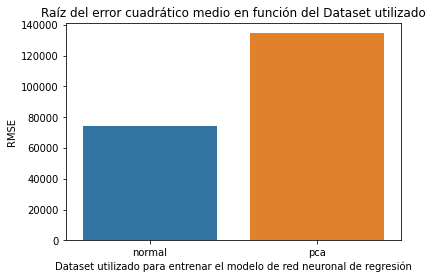

In [312]:
pairs = results_reg.items()
keys = list(map(lambda pair: pair[0], pairs))
values = list(map(lambda pair: pair[1], pairs))
bp = sns.barplot(x = keys, y=np.sqrt(values))
plt.xlabel('Dataset utilizado para entrenar el modelo de red neuronal de regresión')
plt.ylabel('RMSE')
plt.title('Raíz del error cuadrático medio en función del Dataset utilizado')
plt.show()

La red entrenada utilizando el dataset con PCA dejó mucho mayor error cuadrático medio por lo que el modelo es inutil, predice con un error similar a lo que podría tranquilamente ser el precio de una propiedad, dejando ver claramente que el dataset sin aplicar PCA tuvo mucha mejor performance. Además, el dataset normal tuvo un error MAPE del 20% que es aceptable considerando el target de precios de propiedad.

De todos modos si comparamos el RMSE con el modelo XGBRegressor del TP1 la performance en test no es del todo buena para la red ya que se obtuvo al rededor de 25k USD más de RMSE:

    Modelo XGBRegressor del TP1:
    El error (rmse) de test es: 46218.4882801093

    Red Neuronal de Regresion:
    El error (rmse) de test es: 70746.2421875

A su vez si comparamos la performance de la red con el modelo XGBRegressor entrenado con el dataset ampliado analizado anteriormente se puede ver que con la diferencia de RMSE es en este caso cercana a los 40k USD:

    Modelo XGBRegressor optimizado y entrenado con dataset ampliado:
    El error (rmse) de test es: 31906.920429890633

    Red Neuronal de Regresion:
    El error (rmse) de test es: 70746.2421875


##● Clasificación:

### Dataset normal

#### Crear modelo

Predecir el precio de la propiedad y utilizar como métrica de
evaluación el error cuadrático medio.

Defino conjuntos de train y test:

In [313]:
x_train = df_ENCODED_train.drop(['tipo_precio','property_price','pxm2'], axis=1).values
x_test = df_ENCODED_test.drop(['tipo_precio','property_price','pxm2'], axis=1).values

num_classes = 3
y_train = df_ENCODED_train['tipo_precio'].values
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = df_ENCODED_test['tipo_precio'].values
y_test = keras.utils.to_categorical(y_test, num_classes)

Escalo los datos de entrada usando MinMax:

In [314]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

'build_model_from_parameters' crea y compila un modelo keras basado en los hiperparámetros:
- units: neuronas en una capa
- activation: función de activación
- dropout: booleano para hacer o no dropout
- lr: el learning rate del modelo.
- num_layers: capas del modelo

Luego build_model usa la utilidad HyperParameters() para crear un espacio de búsqueda de hiperparámetros

In [315]:
# def hiperparams
def build_model_from_parameters(units, activation, dropout, lr, num_layers):
    model = keras.Sequential()
    for i in range(0,num_layers):
        model.add(layers.Dense(units=units, activation=activation))
    if dropout:
        model.add(layers.Dropout(rate=0.25))
    model.add(layers.Dense(3, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
    return model

def build_model(hp):
    units = hp.Int("units", min_value=4, max_value=16, step=8)
    activation = hp.Choice("activation", ["relu", "tanh", "linear"])
    dropout = hp.Boolean("dropout")
    learn_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    layers = hp.Int("units", min_value=4, max_value=5, step=1)
    model = build_model_from_parameters(
        units=units, 
        activation=activation, 
        dropout=dropout, 
        lr=learn_rate, 
        num_layers = layers
    )
    return model


In [316]:
import keras_tuner

Creamos el tuner e imprimimos el espacio de búsqueda creado

In [317]:
tuner = keras_tuner.RandomSearch(
    seed = 0,
    hypermodel=build_model,
    objective=keras_tuner.Objective("recall", direction="min"),
    max_trials=max_trials,
    executions_per_trial=executions_per_trial,
    overwrite=True,
    directory=".",
    project_name="helloworld",
)
tuner.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 16, 'step': 8, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'linear'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


Seleccionamos un subconjunto del conjunto train, para hacer tuning de hiperparámetros. Este se divide en una parte train y una parte de validación

In [318]:
from sklearn.model_selection import train_test_split
train_size = TUNER_PROPORTION*(1-TUNER_TEST_PROPORTION)
test_size = TUNER_PROPORTION*TUNER_TEST_PROPORTION
X_train_, X_eval = train_test_split(x_train, train_size = train_size, test_size=test_size, random_state=0)
y_train_, y_eval = train_test_split(y_train, train_size = train_size, test_size=test_size, random_state=0)

In [319]:
tuner.search(X_train_, y_train_, epochs=2, validation_data=(X_eval, y_eval))

Trial 10 Complete [00h 00m 03s]
recall: 0.0

Best recall So Far: 0.0
Total elapsed time: 00h 00m 44s


Armamos el mejor modelo e imprimimos un resumen de sus capas

In [320]:
# Get the top model.
models = tuner.get_best_models(num_models=1)
best_model = models[0]
# Build the model.
best_model.build((None, x_train.shape[1]))
best_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 92        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 3)                 15        
                                                                 
Total params: 167
Trainable params: 167
Non-trainable params: 0
_________________________________________________________________


In [321]:
tuner.results_summary()

Results summary
Results in ./helloworld
Showing 10 best trials
Trial summary
Hyperparameters:
units: 4
activation: relu
dropout: False
lr: 0.0019779296003476373
Score: 0.0
Trial summary
Hyperparameters:
units: 12
activation: relu
dropout: False
lr: 0.0013649679576430186
Score: 0.0
Trial summary
Hyperparameters:
units: 12
activation: relu
dropout: False
lr: 0.007368471951434973
Score: 0.0
Trial summary
Hyperparameters:
units: 12
activation: relu
dropout: False
lr: 0.0002329641541284472
Score: 0.0
Trial summary
Hyperparameters:
units: 12
activation: tanh
dropout: False
lr: 0.0023648890851369585
Score: 0.0
Trial summary
Hyperparameters:
units: 4
activation: relu
dropout: False
lr: 0.0054020687227606555
Score: 0.0
Trial summary
Hyperparameters:
units: 4
activation: relu
dropout: False
lr: 0.0004950730368708272
Score: 0.0
Trial summary
Hyperparameters:
units: 4
activation: linear
dropout: False
lr: 0.000582968539368285
Score: 0.03198294201865792
Trial summary
Hyperparameters:
units: 12
acti

In [322]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 92        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 3)                 15        
                                                                 
Total params: 167
Trainable params: 167
Non-trainable params: 0
_________________________________________________________________


#### Entrenar

In [323]:
his = best_model.fit(
 x_train, y_train,
 batch_size = 32,
 epochs = epochs,
 verbose = 0,
 validation_split = 0.1)

#### Evaluar

In [324]:
y_pred = best_model.predict(
 x_test)

454/454 [==============================] - 1s 1ms/step


In [325]:
y_test_list = list(map(lambda cats: np.argmax(cats), y_test))

In [326]:
y_guesses = list(map(lambda cats: np.argmax(cats), y_pred))

In [327]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [328]:
f1_score(y_guesses, y_test_list, average = 'micro')

0.5771668733636489

In [329]:
recall_score(y_guesses, y_test_list,  average = None)


array([0.60690943, 0.56537841, 0.60999457])

In [330]:
precision_score(y_guesses, y_test_list,  average = None)

array([0.36827195, 0.81305476, 0.30674679])

In [331]:
results_clas['normal'] = f1_score(y_guesses, y_test_list, average = 'micro')

Graficamos la matriz de confusión-

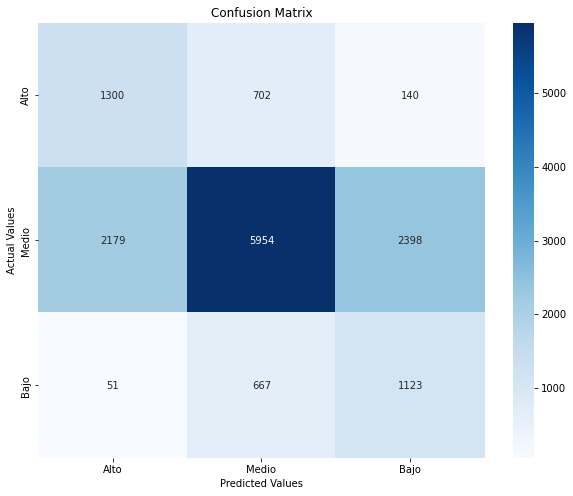

In [332]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_guesses, y_test_list)
cm_df = pd.DataFrame(cm,
                     index = ['Alto','Medio','Bajo'], 
                     columns = ['Alto','Medio','Bajo'])

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, cmap='Blues', annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

### Se guarda el modelo de redes neuronales para clasificación entrenado con el dataset obtenido en el TP1

In [333]:
import joblib  

try:
  joblib.dump(best_model, 'drive/My Drive/tp1 datos grupal/ModelosTP2/RedNeuronalClasificacion.pkl')
except:
  joblib.dump(best_model, 'RedNeuronalClasificacion.pkl')

### Dataset PCA

#### Crear modelo

In [334]:
x_train = df_PCA_ENCODED_train.drop(['tipo_precio','property_price','pxm2'], axis=1).values
x_test = df_PCA_ENCODED_test.drop(['tipo_precio','property_price','pxm2'], axis=1).values

num_classes = 3
y_train = df_PCA_ENCODED_train['tipo_precio'].values
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = df_PCA_ENCODED_test['tipo_precio'].values
y_test = keras.utils.to_categorical(y_test, num_classes)

In [335]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Creamos el tuner e imprimimos el espacio de búsqueda creado

In [336]:
tuner = keras_tuner.RandomSearch(
    seed = 0,
    hypermodel=build_model,
    objective=keras_tuner.Objective("recall", direction="max"),
    max_trials=max_trials,
    executions_per_trial=executions_per_trial,
    overwrite=True,
    directory=".",
    project_name="helloworld",
)
tuner.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 16, 'step': 8, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'linear'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


Seleccionamos un subconjunto del conjunto train, para hacer tuning de hiperparámetros. Este se divide en una parte train y una parte de validación

In [337]:
from sklearn.model_selection import train_test_split
train_size = TUNER_PROPORTION*(1-TUNER_TEST_PROPORTION)
test_size = TUNER_PROPORTION*TUNER_TEST_PROPORTION
X_train_, X_eval = train_test_split(x_train, train_size = train_size, test_size=test_size, random_state=0)
y_train_, y_eval = train_test_split(y_train, train_size = train_size, test_size=test_size, random_state=0)

In [338]:
tuner.search(X_train_, y_train_, epochs=2, validation_data=(X_eval, y_eval))

Trial 10 Complete [00h 00m 06s]
recall: 0.14498934149742126

Best recall So Far: 0.25479744374752045
Total elapsed time: 00h 00m 45s


Armamos el mejor modelo e imprimimos un resumen de sus capas

In [339]:
# Get the top model.
models = tuner.get_best_models(num_models=1)
best_model = models[0]
# Build the model.
best_model.build((None, x_train.shape[1]))
best_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                240       
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dense_3 (Dense)             (None, 12)                156       
                                                                 
 dense_4 (Dense)             (None, 12)                156       
                                                                 
 dense_5 (Dense)             (None, 12)                156       
                                                                 
 dense_6 (Dense)             (None, 12)                1

In [340]:
tuner.results_summary()

Results summary
Results in ./helloworld
Showing 10 best trials
Trial summary
Hyperparameters:
units: 12
activation: linear
dropout: True
lr: 0.0028727886699530594
Score: 0.25479744374752045
Trial summary
Hyperparameters:
units: 12
activation: linear
dropout: True
lr: 0.00030201655847076974
Score: 0.2398720681667328
Trial summary
Hyperparameters:
units: 4
activation: linear
dropout: False
lr: 0.00369718480748867
Score: 0.21321962028741837
Trial summary
Hyperparameters:
units: 12
activation: tanh
dropout: True
lr: 0.005229719005846043
Score: 0.19616204127669334
Trial summary
Hyperparameters:
units: 12
activation: tanh
dropout: False
lr: 0.006038754607580714
Score: 0.14498934149742126
Trial summary
Hyperparameters:
units: 4
activation: linear
dropout: True
lr: 0.0013842259699198398
Score: 0.1268656700849533
Trial summary
Hyperparameters:
units: 4
activation: tanh
dropout: False
lr: 0.00013515514857868552
Score: 0.02771855052560568
Trial summary
Hyperparameters:
units: 4
activation: relu
d

In [341]:
y_train

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [342]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                240       
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dense_3 (Dense)             (None, 12)                156       
                                                                 
 dense_4 (Dense)             (None, 12)                156       
                                                                 
 dense_5 (Dense)             (None, 12)                156       
                                                                 
 dense_6 (Dense)             (None, 12)                1

#### Entrenar

In [343]:
his = best_model.fit(
 x_train, y_train,
 batch_size = 32,
 epochs = epochs,
 verbose = 0,
 validation_split = 0.1)

#### Evaluar

In [344]:
y_pred = best_model.predict(
 x_test)

454/454 [==============================] - 1s 2ms/step


In [345]:
y_test_list = list(map(lambda cats: np.argmax(cats), y_test))

In [346]:
y_guesses = list(map(lambda cats: np.argmax(cats), y_pred))

In [347]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [348]:
f1_score(y_guesses, y_test_list, average = 'micro')

0.5279040926002481

In [349]:
recall_score(y_guesses, y_test_list,  average = None)


array([0.56374086, 0.52792395, 0.44376528])

In [350]:
precision_score(y_guesses, y_test_list,  average = None)

array([0.30566572, 0.84937867, 0.09915324])

In [351]:
results_clas['pca'] = f1_score(y_guesses, y_test_list, average = 'micro')

Vemos la matriz de confusión

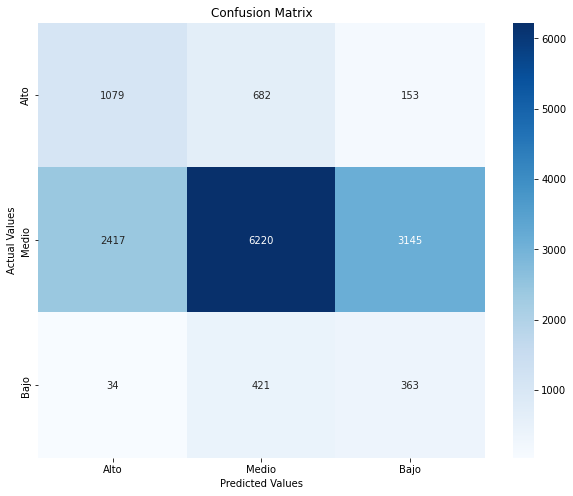

In [352]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_guesses, y_test_list)
cm_df = pd.DataFrame(cm,
                     index = ['Alto','Medio','Bajo'], 
                     columns = ['Alto','Medio','Bajo'])

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, cmap='Blues', annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

### Se guarda el modelo de redes neuronales para clasificación entrenado con el dataset obtenido en el TP1

In [353]:
import joblib  

try:
  joblib.dump(best_model, 'drive/My Drive/tp1 datos grupal/ModelosTP2/RedNeuronalClasificacion_PCA.pkl')
except:
  joblib.dump(best_model, 'RedNeuronalClasificacion_PCA.pkl')

### Conclusiones

Al igual que con la red neuronal de regresión, la red neuronal de clasificación performó mejor cuando se entrenó utilizando el dataset normal. Se toma como referencia el F1 score debido a que fue la metrica tomada para evaluar performance en el TP1:

    Red Neuronal de clasificación entrenada con dataset normal:
    F1-score test: 0.5932892379771255

    Red Neuronal de clasificación entrenada con dataset con PCA:
    F1-score test: 0.48718478710210833



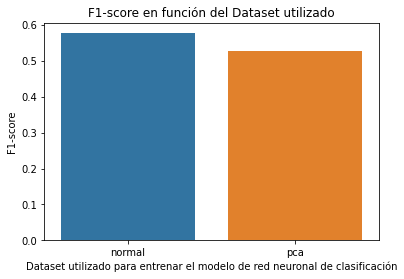

In [354]:
pairs = results_clas.items()
keys = list(map(lambda pair: pair[0], pairs))
values = list(map(lambda pair: pair[1], pairs))
bp = sns.barplot(x = keys, y=values)
plt.xlabel('Dataset utilizado para entrenar el modelo de red neuronal de clasificación')
plt.ylabel('F1-score')
plt.title('F1-score en función del Dataset utilizado')
plt.show()

Al igual que con los modelos entrenados en el TP1, vemos que la red entrenada con el dataset normal tuvo mejor performance en general, por lo que se realiza el análisis/ comparación sobre este modelo.

El F1-score para el dataset normal fue aproximadamente 0.59, comparable a la performance de los modelos Árbol de decisión y Random Forest entrenados en el TP1 para el mismo dataset, pero de todos modos considerablemente menor a la performance de CatBoostClassifier y XGBoostClassifier ambos con F1-score cercano a 0.68. 

En general al igual que en el TP1, el modelo identifica incorrectamente valores medios como altos, valores bajos como medios, y valores medio como bajos, el f1 score es mediocre como en el TP1. 

Comparando con la matriz de confusión, los valores predichos como altos ahora son en su mayoría de valor verdadero 'medio'. También como antes, no se suelen confundir valores bajos con altos y viceversa.

La mala performance a través de modelos distintos puede que indique una pobre técnica de discretización de los precios de las propiedades, ya que los modelos predicen la mayoría de las veces que el tipo de precio es 'medio'.

#**3. Ensamble de modelos**

En la siguiente sección se utilizarán técnicas de ensamble de modelos de Machine Learning con el objetivo de mejorar la performance obtenida utilizando un único modelo débil para resolver problemas de clasificación y/o regresión.

A continuación se construyen dos ensambles de modelos de tipo híbridos, esto significa que combinan clasificadores de distinto tipo.

##● Ensamble 1:

**Ensamble tipo Voting para el conjunto de datos de clasificación:**

  Al realizar este tipo de ensamble se tienen diferentes algoritmos/modelos y todos se entrenan con los mismos datos. En los problemas de clasificación existen dos variantes: Hard Voting y Soft Voting.

  En el esquema de **Hard Voting** la clase final es la que tenga mayor cantidad de votos. Es un sistema democrático.

En cambio cuando se hace uso de **Soft Voting** lo que se toma en cuenta son las probabilidades de cada clase. Para cada clasificador se obtiene la probabilidad de la clase1, clase2, etc. Luego se promedian los valores de probabilidad de cada clase y se selecciona la que tenga el mayor valor promedio.

El target en este problema de clasificación será el 'tipo_precio' de una propiedad, que tiene tres categorías: alto, medio, bajo. 

Se utiliza el preprocesamiento y encoding de datos realizado en el TP1. A continuación se seleccionan los datos de train y test.

In [355]:
#Se descarta el target y las variables directamente relacionadas con el
x_train = df_ENCODED_train.drop(['tipo_precio','property_price','pxm2'], axis=1).values
x_test = df_ENCODED_test.drop(['tipo_precio','property_price','pxm2'], axis=1).values

num_classes = 3

y_train = df_ENCODED_train['tipo_precio'].values
y_test = df_ENCODED_test['tipo_precio'].values

Se escalan los datos usando MinMaxScaler:

In [356]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Modelos elegidos
Siendo un ensamble de tipo híbrido, se escogieron los siguientes clasificadores para el ensemble:
- Random Forest
- AdaBoost
- Gradient Boost
- XGBoost
- Decision Tree

In [357]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score
import joblib  

In [358]:
#Se crean los clasificadores, Se utilizan algunos modelos con hiperparámetros optimizados en el TP1 mediante GSCV
clf1 = AdaBoostClassifier()
clf2 = joblib.load('drive/My Drive/tp1 datos grupal/Modelos/RandomForest.pkl')
clf3 = GradientBoostingClassifier()
clf4 = joblib.load('drive/My Drive/tp1 datos grupal/Modelos/XGBoostClassifier.pkl')
clf5 = joblib.load('drive/My Drive/tp1 datos grupal/Modelos/ArbolDeDecision.pkl')

El clasificador de votaciones tiene dos hiperparámetros básicos: estimadores y votaciones.

El hiperparámetro estimators crea una lista los clasificadores y les asigna nombres.

El hiperparámetro de votación se establece en "hard" o "soft".

In [359]:
from sklearn.ensemble import VotingClassifier

#### Hard Voting

In [360]:
#Se crea el ensemble de Votación
eclf = VotingClassifier(
    estimators=[('ada', clf1), ('rf', clf2), ('gb', clf3), ('xgb', clf4), ('dt', clf5)],
    voting='hard')

In [361]:
#Se entrena el ensamble
eclf = eclf.fit(x_train, y_train)

In [362]:
result_clasif_hardv = {}

In [363]:
#Y se evalúa la performance sobre datos de Test
for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf], ['ada', 'rf', 'gb', 'xgb', 'dt', 'Ensemble Hard Voting']):
    scores = cross_val_score(clf, x_test, y_test, scoring='f1_micro', cv=5)
    result_clasif_hardv[label] = scores.mean()
    print("F1-Score: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

F1-Score: 0.57 (+/- 0.01) [ada]
F1-Score: 0.55 (+/- 0.01) [rf]
F1-Score: 0.62 (+/- 0.01) [gb]
F1-Score: 0.64 (+/- 0.00) [xgb]
F1-Score: 0.60 (+/- 0.00) [dt]
F1-Score: 0.61 (+/- 0.00) [Ensemble Hard Voting]


In [364]:
# Get predictions for TEST
y_pred = eclf.predict(x_test)

from sklearn.metrics import confusion_matrix, f1_score
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='micro')))

F1-Score: 0.6236047953699876


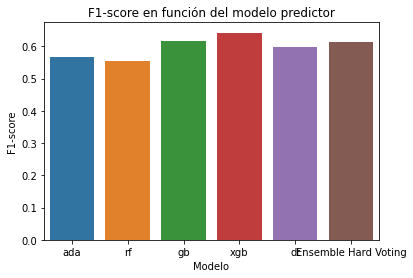

In [365]:
pairs = result_clasif_hardv.items()
keys = list(map(lambda pair: pair[0], pairs))
values = list(map(lambda pair: pair[1], pairs))
bp = sns.barplot(x = keys, y=values)
plt.xlabel('Modelo')
plt.ylabel('F1-score')
plt.title('F1-score en función del modelo predictor')
plt.show()

#### Se guarda el modelo de Ensamble Hard Voting de clasificación

In [366]:
import joblib  

try:
  joblib.dump(eclf, 'drive/My Drive/tp1 datos grupal/ModelosTP2/EnsambleHardVotingClasificacion.pkl')
except:
  joblib.dump(eclf, 'EnsambleHardVotingClasificacion.pkl')

#### Soft Voting

In [367]:
eclf2 = VotingClassifier(
    estimators=[('ada', clf1), ('rf', clf2), ('gb', clf3), ('xgb', clf4), ('dt', clf5)],
    voting='soft')

In [368]:
eclf2 = eclf2.fit(x_train, y_train)

In [369]:
result_clasif_softv = {}

In [370]:
for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf2], ['ada', 'rf', 'gb', 'xgb', 'dt', 'Ensemble Soft Voting']):
    scores = cross_val_score(clf, x_test, y_test, scoring='f1_micro', cv=5)
    result_clasif_softv[label] = scores.mean()
    print("F1-Score: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

F1-Score: 0.57 (+/- 0.01) [ada]
F1-Score: 0.56 (+/- 0.01) [rf]
F1-Score: 0.62 (+/- 0.01) [gb]
F1-Score: 0.64 (+/- 0.00) [xgb]
F1-Score: 0.60 (+/- 0.00) [dt]
F1-Score: 0.62 (+/- 0.00) [Ensemble Soft Voting]


In [371]:
# Get predictions for TEST
y_pred = eclf2.predict(x_test)

from sklearn.metrics import confusion_matrix, f1_score
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='micro')))

F1-Score: 0.6397960589775389


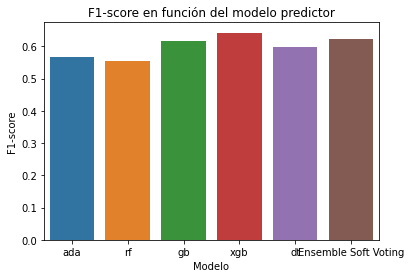

In [372]:
pairs = result_clasif_softv.items()
keys = list(map(lambda pair: pair[0], pairs))
values = list(map(lambda pair: pair[1], pairs))
bp = sns.barplot(x = keys, y=values)
plt.xlabel('Modelo')
plt.ylabel('F1-score')
plt.title('F1-score en función del modelo predictor')
plt.show()

#### Se guarda el modelo de Ensamble Soft Voting de clasificación

In [373]:
import joblib  

try:
  joblib.dump(eclf2, 'drive/My Drive/tp1 datos grupal/ModelosTP2/EnsambleSoftVotingClasificacion.pkl')
except:
  joblib.dump(eclf2, 'EnsambleSoftVotingClasificacion.pkl')

### Conclusiones

La performance en test de los ensambles de clasificación hard voting y soft voting fue muy similar:

    Ensamble Hard Voting:
    F1-Score: 0.6212622295714483

    Ensamble Soft Voting:
    F1-Score: 0.6394515640071655

Soft voting performó levemente mejor ya que las predicciones se ponderan según la importancia del clasificador y luego, la etiqueta objetivo con la mayor suma de probabilidades ponderadas gana la votación, suponemos que le dió mas importancia a XGBoost Classifier.

Luego, podemos decir que ambos ensambles performaron mejor que la red neuronal de clasificación:

    Red Neuronal de clasificación entrenada con dataset normal:
    F1-score test: 0.5932892379771255

Sin embargo los resultados no fueron tan buenos como esperabamos, ya que los ensambles de modelos tienden a generalizar mejor que los modelos base, pero este no fue el caso ya que XGBClassifier performa mejor individualmente que ambos ensambles:

    Modelo XGBClassifier TP1:
    F1-Score: 0.6779661016949152

 Por lo que concluímos que alguno de los modelos que se utilizaron para los ensambles está haciando ruido y baja la performance. 

##● Ensamble 2:

**Ensamble de tipo Stacking:**

  En este tipo de ensamble se combinan diferentes modelos de regresión que funcionan como 'modelos base', y se utiliza un modelo adicional que usa como entradas las predicciones de los Base Models y a partir de ellas decide, dada una instancia nueva, qué modelo usar. Es decir, se utiliza el concepto de meta-aprendizaje para reemplazar el mecanismo de voto.

In [374]:
x_train = df_ENCODED_train.drop(['tipo_precio','property_price','pxm2'], axis=1).values
y_train = df_ENCODED_train['property_price'].values

x_test = df_ENCODED_test.drop(['tipo_precio','property_price','pxm2'], axis=1).values
y_test = df_ENCODED_test['property_price'].values

En este caso se utiliza como modelos base:
- Random Forest
- AdaBoost
- Gradient Boost

Y como meta modelo:
- RandomForestRegressor

In [375]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

#Modelos Base
estimators = [
    ('lr', AdaBoostRegressor(random_state=0, n_estimators = 50)),
    ('ada', GradientBoostingRegressor(random_state=0, n_estimators = 50)),
    ('rf', RandomForestRegressor(random_state=0, n_estimators = 50)),
]

#Ensamble Stacking Regressor
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=50,
                                          random_state=0)
)

In [376]:
#Se entrena el ensamble
model = reg.fit(x_train, y_train)

In [377]:
#Se evalúa en datos de test
model.score(x_test, y_test)

0.8949886710886569

In [378]:
#Performance para datos de TRAIN
y_pred = model.predict(x_train)

mse = metrics.mean_squared_error(
        y_true  = y_train,
        y_pred  = y_pred,
        squared = True
       )

print(f"El error (mse) de train es: {mse}")
print(f"El error (rmse) de train es: {np.sqrt(mse)}")

El error (mse) de train es: 576788034.6424081
El error (rmse) de train es: 24016.411776999663


In [379]:
#Performance para datos de TEST
y_pred = model.predict(x_test)

mse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = True
       )

print(f"El error (mse) de test es: {mse}")
print(f"El error (rmse) de test es: {np.sqrt(mse)}")

El error (mse) de test es: 2052717592.5344405
El error (rmse) de test es: 45306.926540369524


#### Se guarda el modelo de Ensamble de tipo Stacking para regresión

In [381]:
import joblib  

try:
  joblib.dump(reg, 'drive/My Drive/tp1 datos grupal/ModelosTP2/EnsambleStackingRegresion.pkl')
except:
  joblib.dump(reg, 'EnsambleStackingRegresion.pkl')

### Análisis de performance

En este caso el ensable tipo stacking para regresión performó de manera muy similar que el modelo XGBRegressor con hiperparámetros optimizados para el dataset generado en el TP1:
    
    Ensable tipo stacking para regresión:
    El error (mse) de test es: 2052717592.5344405
    El error (rmse) de test es: 45306.926540369524

    XGBRegressor TP1:
    El error (mse) de test es: 2136148658.8986006
    El error (rmse) de test es: 46218.4882801093

Nuevamente no logramos obtener mejoras significativas utilizando un ensamble de varios modelos base de regresión, en este caso consideramos que se debe a que los hiperparametros del metamodelo no fueron optimizados.

#**4. Conclusiones**

En el primer punto buscamos optimizar uno de los modelos del primer TP aplicando  metodos de extraccion de aspectos a partir de las descripciones de cada propiedad, fue el punto donde más problemas tuvimos del trabajo, no logramos hacer funcionar las herramientas de Open Information Extraction, nos costó entender y aplicar Minqing Hu/Bing Liu aunque finalmente pudimos aplicarlo y también aplicamos regex que no tuvimos grandes problemas.

 
Con la técnica de Minqing Hu y Bing Liu logramos obtener aspectos valorativos sobre la propiedad, a diferencia de la aplicación del método para análisis de sentimiento (en donde se buscan polaridades positivas-negativas) solo buscamos valoraciones positivas de diversos aspectos.
 
Por otro lado utilizamos regex/bag of words para obtener aspectos binarios basandonos en el supuesto de que en la descripción de la propiedad los vendedores resaltan los aspectos POSITIVOS de la misma. Por lo tanto si la propiedad NO tiene cierta cualidad, probablemente no aparezca esa palabra en la descripción ya que los aspectos negativos no atraen a los posibles compradores y por ende es preferible directamente no mencionar dicho aspecto antes que exponer que la propiedad NO TIENE tal cosa. De este modo obtuvimos 5 nuevos features que representan: 
- si la propiedad tiene piscina
- si tiene terraza
- si tiene balcón
- si tiene gimnasio
- si tiene parrilla
 
Sumando estos aspectos al dataset original y entrenando nuevamente un modelo XGBoost como lo habiamos hecho con trabajo anterior, y otro con nuevos hiperparametros optimizados, se lograron mejoras considerables respecto de la performance obtenida en el TP1, tal y como se detalla en las conclusiones del punto 1.

En los otros dos puntos no tuvimos en términos generales mejoras en términos absolutos respecto a los modelos del primer trabajo, pero si tuvimos mejoras respecto a la reducción del sobre entrenamiento en algunos casos.
 
En particular en el caso de las redes neuronales nos hubiera gustado poder ajustar mejor los hiper parámetros, pero el hecho de que tarde tanto el entrenamiento nos limitó. Mientras que en el caso de los ensambles quisiéramos haber tenido más tiempo para ajustar los hiperparametros del metamodelo del caso stacking.
 
En términos generales lo que evidenciamos o sospechamos producto de la considerable mejora de resultados al agregar más aspectos en el punto uno (y los resultados similares al variar los modelos) es que al data set inicial le falta informacion osea que difícilmente podamos mejorar las métricas solamente variando los modelos y que por eso fueron centrales los métodos de selección de aspectos.

